In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from bokeh.io import output_notebook
from importlib import reload
%matplotlib inline

import moving_average as ma
import utility

/home/ryohayama/.local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
data = pd.read_csv('fx_data/DAT_ASCII_USDJPY_M1_2017.csv', sep=';', header=None)
data.columns = ['time', 'open', 'high', 'low', 'close', 'volume']
data['time'] = pd.to_datetime(data['time'], infer_datetime_format=True)
data = data.set_index('time')
del data['volume']

In [3]:
agg60 = utility.aggregate_periods(data, period=60)

In [4]:
reload(ma)
collection1 = ma.MACollection(agg60.iloc[:1000]['close'], type_='simple', periods=[9, 20])
collection1.plotWithCrosses(plot_width=800)

Loading BokehJS ...

In [5]:
d1 = collection1.data
d1.head(30)

close  numerical_index        SMA9      SMA20  \
time                                                                   
2017-01-02 03:03:00  117.167                0         NaN        NaN   
2017-01-02 04:04:00  117.408                1         NaN        NaN   
2017-01-02 05:06:00  117.409                2         NaN        NaN   
2017-01-02 06:09:00  117.320                3         NaN        NaN   
2017-01-02 07:11:00  117.386                4         NaN        NaN   
2017-01-02 08:12:00  117.452                5         NaN        NaN   
2017-01-02 09:13:00  117.366                6         NaN        NaN   
2017-01-02 10:13:00  117.370                7         NaN        NaN   
2017-01-02 11:13:00  117.323                8  117.355667        NaN   
2017-01-02 12:16:00  117.402                9  117.381778        NaN   
2017-01-02 13:18:00  117.400               10  117.380889        NaN   
2017-01-02 14:22:00  117.458               11  117.386333        NaN   
2017-01-02 15:22:00  117.599               12  117.417333        NaN   
2017-01-02 16:23:00  117.602               13  117.441333        NaN   
2017-01-02 17:24:00  117.453               14  117.441444        NaN   
2017-01-02 18:24:00  117.333               15  117.437778        NaN   
2017-01-02 19:24:00  117.398               16  117.440889        NaN   
2017-01-02 20:24:00  117.340               17  117.442778        NaN   
2017-01-02 21:24:00  117.378               18  117.440111        NaN   
2017-01-02 22:27:00  117.376               19  117.437444  117.39700   
2017-01-02 23:28:00  117.361               20  117.426667  117.40670   
2017-01-03 00:28:00  117.334               21  117.397222  117.40300   
2017-01-03 01:28:00  117.337               22  117.367778  117.39940   
2017-01-03 02:28:00  117.765               23  117.402444  117.42165   
2017-01-03 03:28:00  117.964               24  117.472556  117.45055   
2017-01-03 04:28:00  118.096               25  117.550111  117.48275   
2017-01-03 05:28:00  118.144               26  117.639444  117.52165   
2017-01-03 06:28:00  118.326               27  117.744778  117.56945   
2017-01-03 07:28:00  118.298               28  117.847222  117.61820   
2017-01-03 08:28:00  118.246               29  117.945556  117.66040   

                     ma_difference  cross  
time                                       
2017-01-02 03:03:00            NaN      0  
2017-01-02 04:04:00            NaN      0  
2017-01-02 05:06:00            NaN      0  
2017-01-02 06:09:00            NaN      0  
2017-01-02 07:11:00            NaN      0  
2017-01-02 08:12:00            NaN      0  
2017-01-02 09:13:00            NaN      0  
2017-01-02 10:13:00            NaN      0  
2017-01-02 11:13:00            NaN      0  
2017-01-02 12:16:00            NaN      0  
2017-01-02 13:18:00            NaN      0  
2017-01-02 14:22:00            NaN      0  
2017-01-02 15:22:00            NaN      0  
2017-01-02 16:23:00            NaN      0  
2017-01-02 17:24:00            NaN      0  
2017-01-02 18:24:00            NaN      0  
2017-01-02 19:24:00            NaN      0  
2017-01-02 20:24:00            NaN      0  
2017-01-02 21:24:00            NaN      0  
2017-01-02 22:27:00       0.040444      0  
2017-01-02 23:28:00       0.019967      0  
2017-01-03 00:28:00      -0.005778     -1  
2017-01-03 01:28:00      -0.031622      0  
2017-01-03 02:28:00      -0.019206      0  
2017-01-03 03:28:00       0.022006      1  
2017-01-03 04:28:00       0.067361      0  
2017-01-03 05:28:00       0.117794      0  
2017-01-03 06:28:00       0.175328      0  
2017-01-03 07:28:00       0.229022      0  
2017-01-03 08:28:00       0.285156      0

In [6]:
d2 = pd.concat([d1['close'], d1['cross']], axis=1).reset_index()
d2

time    close  cross
0   2017-01-02 03:03:00  117.167      0
1   2017-01-02 04:04:00  117.408      0
2   2017-01-02 05:06:00  117.409      0
3   2017-01-02 06:09:00  117.320      0
4   2017-01-02 07:11:00  117.386      0
5   2017-01-02 08:12:00  117.452      0
6   2017-01-02 09:13:00  117.366      0
7   2017-01-02 10:13:00  117.370      0
8   2017-01-02 11:13:00  117.323      0
9   2017-01-02 12:16:00  117.402      0
10  2017-01-02 13:18:00  117.400      0
11  2017-01-02 14:22:00  117.458      0
12  2017-01-02 15:22:00  117.599      0
13  2017-01-02 16:23:00  117.602      0
14  2017-01-02 17:24:00  117.453      0
15  2017-01-02 18:24:00  117.333      0
16  2017-01-02 19:24:00  117.398      0
17  2017-01-02 20:24:00  117.340      0
18  2017-01-02 21:24:00  117.378      0
19  2017-01-02 22:27:00  117.376      0
20  2017-01-02 23:28:00  117.361      0
21  2017-01-03 00:28:00  117.334     -1
22  2017-01-03 01:28:00  117.337      0
23  2017-01-03 02:28:00  117.765      0
24  2017-01-03 03:28:00  117.964      1
25  2017-01-03 04:28:00  118.096      0
26  2017-01-03 05:28:00  118.144      0
27  2017-01-03 06:28:00  118.326      0
28  2017-01-03 07:28:00  118.298      0
29  2017-01-03 08:28:00  118.246      0
..                  ...      ...    ...
970 2017-02-27 14:21:00  112.783      0
971 2017-02-27 15:21:00  112.766      0
972 2017-02-27 16:21:00  112.736      0
973 2017-02-27 17:21:00  112.676      0
974 2017-02-27 18:21:00  112.713      0
975 2017-02-27 19:21:00  112.715      0
976 2017-02-27 20:21:00  112.577      0
977 2017-02-27 21:21:00  112.551      0
978 2017-02-27 22:21:00  112.658      0
979 2017-02-27 23:21:00  112.596      0
980 2017-02-28 00:21:00  112.550      0
981 2017-02-28 01:21:00  112.457      0
982 2017-02-28 02:21:00  112.431      0
983 2017-02-28 03:21:00  112.399      0
984 2017-02-28 04:21:00  112.310      0
985 2017-02-28 05:21:00  112.354     -1
986 2017-02-28 06:21:00  112.204      0
987 2017-02-28 07:21:00  112.155      0
988 2017-02-28 08:21:00  112.158      0
989 2017-02-28 09:21:00  112.059      0
990 2017-02-28 10:21:00  111.866      0
991 2017-02-28 11:21:00  112.006      0
992 2017-02-28 12:21:00  111.736      0
993 2017-02-28 13:21:00  112.008      0
994 2017-02-28 14:21:00  112.025      0
995 2017-02-28 15:21:00  112.197      0
996 2017-02-28 16:21:00  112.741      0
997 2017-02-28 17:21:00  112.813      0
998 2017-02-28 18:21:00  112.895      0
999 2017-02-28 19:21:00  113.137      1

[1000 rows x 3 columns]

In [7]:
period = 5
signal_indices = [i for i in d2[(d2['cross'] == 1) | (d2['cross'] == -1)].index if (i+period) in d2.index]
return_indices = [i+period for i in signal_indices if (i+period) in d2.index]

In [8]:
period_returns = 100*((np.array(d2.loc[return_indices, 'close']) / np.array(d2.loc[signal_indices, 'close'])) -1)

In [9]:
period_returns

array([ 0.69033699,  0.23905598,  0.20304137, -0.42449713,  0.27629492,
       -0.05508978, -0.27900109, -0.09323768,  0.24516575, -0.04736316,
       -0.21769297,  0.21438469, -0.15323936, -0.27777048, -0.71739912,
        0.19874218,  0.2147009 , -0.17802866, -0.81801912, -0.13510769,
       -0.11440238, -0.38977265, -0.10408305,  0.09977308,  0.05562128,
        0.01138553, -0.42742855,  0.19714798, -0.39127708,  0.17632465,
       -0.00355748,  0.06941107,  0.22914308,  0.18820465, -0.49746816,
       -0.44235185,  0.17777381,  0.08112831,  0.33320371, -0.210713  ,
       -0.11859374,  0.03518401, -0.18126941, -0.13114295, -0.22437246,
       -0.06364528,  0.35805536,  0.24082781, -0.01320492, -0.21873925,
       -0.38159173, -0.44485011, -0.00355983, -0.0400666 , -0.43434146])

In [10]:
d2['5periods_return'] = 0
d2.loc[signal_indices, '5periods_return'] = period_returns

In [11]:
d2

time    close  cross  5periods_return
0   2017-01-02 03:03:00  117.167      0         0.000000
1   2017-01-02 04:04:00  117.408      0         0.000000
2   2017-01-02 05:06:00  117.409      0         0.000000
3   2017-01-02 06:09:00  117.320      0         0.000000
4   2017-01-02 07:11:00  117.386      0         0.000000
5   2017-01-02 08:12:00  117.452      0         0.000000
6   2017-01-02 09:13:00  117.366      0         0.000000
7   2017-01-02 10:13:00  117.370      0         0.000000
8   2017-01-02 11:13:00  117.323      0         0.000000
9   2017-01-02 12:16:00  117.402      0         0.000000
10  2017-01-02 13:18:00  117.400      0         0.000000
11  2017-01-02 14:22:00  117.458      0         0.000000
12  2017-01-02 15:22:00  117.599      0         0.000000
13  2017-01-02 16:23:00  117.602      0         0.000000
14  2017-01-02 17:24:00  117.453      0         0.000000
15  2017-01-02 18:24:00  117.333      0         0.000000
16  2017-01-02 19:24:00  117.398      0         0.000000
17  2017-01-02 20:24:00  117.340      0         0.000000
18  2017-01-02 21:24:00  117.378      0         0.000000
19  2017-01-02 22:27:00  117.376      0         0.000000
20  2017-01-02 23:28:00  117.361      0         0.000000
21  2017-01-03 00:28:00  117.334     -1         0.690337
22  2017-01-03 01:28:00  117.337      0         0.000000
23  2017-01-03 02:28:00  117.765      0         0.000000
24  2017-01-03 03:28:00  117.964      1         0.239056
25  2017-01-03 04:28:00  118.096      0         0.000000
26  2017-01-03 05:28:00  118.144      0         0.000000
27  2017-01-03 06:28:00  118.326      0         0.000000
28  2017-01-03 07:28:00  118.298      0         0.000000
29  2017-01-03 08:28:00  118.246      0         0.000000
..                  ...      ...    ...              ...
970 2017-02-27 14:21:00  112.783      0         0.000000
971 2017-02-27 15:21:00  112.766      0         0.000000
972 2017-02-27 16:21:00  112.736      0         0.000000
973 2017-02-27 17:21:00  112.676      0         0.000000
974 2017-02-27 18:21:00  112.713      0         0.000000
975 2017-02-27 19:21:00  112.715      0         0.000000
976 2017-02-27 20:21:00  112.577      0         0.000000
977 2017-02-27 21:21:00  112.551      0         0.000000
978 2017-02-27 22:21:00  112.658      0         0.000000
979 2017-02-27 23:21:00  112.596      0         0.000000
980 2017-02-28 00:21:00  112.550      0         0.000000
981 2017-02-28 01:21:00  112.457      0         0.000000
982 2017-02-28 02:21:00  112.431      0         0.000000
983 2017-02-28 03:21:00  112.399      0         0.000000
984 2017-02-28 04:21:00  112.310      0         0.000000
985 2017-02-28 05:21:00  112.354     -1        -0.434341
986 2017-02-28 06:21:00  112.204      0         0.000000
987 2017-02-28 07:21:00  112.155      0         0.000000
988 2017-02-28 08:21:00  112.158      0         0.000000
989 2017-02-28 09:21:00  112.059      0         0.000000
990 2017-02-28 10:21:00  111.866      0         0.000000
991 2017-02-28 11:21:00  112.006      0         0.000000
992 2017-02-28 12:21:00  111.736      0         0.000000
993 2017-02-28 13:21:00  112.008      0         0.000000
994 2017-02-28 14:21:00  112.025      0         0.000000
995 2017-02-28 15:21:00  112.197      0         0.000000
996 2017-02-28 16:21:00  112.741      0         0.000000
997 2017-02-28 17:21:00  112.813      0         0.000000
998 2017-02-28 18:21:00  112.895      0         0.000000
999 2017-02-28 19:21:00  113.137      1         0.000000

[1000 rows x 4 columns]

In [12]:
def eval_metric_performance(series, metric_col, eval_periods=[1,5,10]):
    df = pd.concat([series, metric_col], axis=1).reset_index()
    series_name = series.name
    metric_name = metric_col.name
    
    for period in eval_periods:
        signal_indices = [i for i in df[(df[metric_name] == 1) | (df[metric_name] == -1)].index if (i+period) in df.index]
        return_indices = [i+period for i in signal_indices if (i+period) in df.index]
        
        period_returns = 100*((np.array(df.loc[return_indices, series_name]) / np.array(df.loc[signal_indices, series_name])) -1)
        
        col_label = str(period) + 'period_return'
        df[col_label] = 0
        
        df.loc[signal_indices, col_label] = period_returns
        
    return df

In [13]:
eval_metric_performance(d1['close'], d1['cross'], [1, 5, 10, 20])

time    close  cross  1period_return  5period_return  \
0   2017-01-02 03:03:00  117.167      0        0.000000        0.000000   
1   2017-01-02 04:04:00  117.408      0        0.000000        0.000000   
2   2017-01-02 05:06:00  117.409      0        0.000000        0.000000   
3   2017-01-02 06:09:00  117.320      0        0.000000        0.000000   
4   2017-01-02 07:11:00  117.386      0        0.000000        0.000000   
5   2017-01-02 08:12:00  117.452      0        0.000000        0.000000   
6   2017-01-02 09:13:00  117.366      0        0.000000        0.000000   
7   2017-01-02 10:13:00  117.370      0        0.000000        0.000000   
8   2017-01-02 11:13:00  117.323      0        0.000000        0.000000   
9   2017-01-02 12:16:00  117.402      0        0.000000        0.000000   
10  2017-01-02 13:18:00  117.400      0        0.000000        0.000000   
11  2017-01-02 14:22:00  117.458      0        0.000000        0.000000   
12  2017-01-02 15:22:00  117.599      0        0.000000        0.000000   
13  2017-01-02 16:23:00  117.602      0        0.000000        0.000000   
14  2017-01-02 17:24:00  117.453      0        0.000000        0.000000   
15  2017-01-02 18:24:00  117.333      0        0.000000        0.000000   
16  2017-01-02 19:24:00  117.398      0        0.000000        0.000000   
17  2017-01-02 20:24:00  117.340      0        0.000000        0.000000   
18  2017-01-02 21:24:00  117.378      0        0.000000        0.000000   
19  2017-01-02 22:27:00  117.376      0        0.000000        0.000000   
20  2017-01-02 23:28:00  117.361      0        0.000000        0.000000   
21  2017-01-03 00:28:00  117.334     -1        0.002557        0.690337   
22  2017-01-03 01:28:00  117.337      0        0.000000        0.000000   
23  2017-01-03 02:28:00  117.765      0        0.000000        0.000000   
24  2017-01-03 03:28:00  117.964      1        0.111899        0.239056   
25  2017-01-03 04:28:00  118.096      0        0.000000        0.000000   
26  2017-01-03 05:28:00  118.144      0        0.000000        0.000000   
27  2017-01-03 06:28:00  118.326      0        0.000000        0.000000   
28  2017-01-03 07:28:00  118.298      0        0.000000        0.000000   
29  2017-01-03 08:28:00  118.246      0        0.000000        0.000000   
..                  ...      ...    ...             ...             ...   
970 2017-02-27 14:21:00  112.783      0        0.000000        0.000000   
971 2017-02-27 15:21:00  112.766      0        0.000000        0.000000   
972 2017-02-27 16:21:00  112.736      0        0.000000        0.000000   
973 2017-02-27 17:21:00  112.676      0        0.000000        0.000000   
974 2017-02-27 18:21:00  112.713      0        0.000000        0.000000   
975 2017-02-27 19:21:00  112.715      0        0.000000        0.000000   
976 2017-02-27 20:21:00  112.577      0        0.000000        0.000000   
977 2017-02-27 21:21:00  112.551      0        0.000000        0.000000   
978 2017-02-27 22:21:00  112.658      0        0.000000        0.000000   
979 2017-02-27 23:21:00  112.596      0        0.000000        0.000000   
980 2017-02-28 00:21:00  112.550      0        0.000000        0.000000   
981 2017-02-28 01:21:00  112.457      0        0.000000        0.000000   
982 2017-02-28 02:21:00  112.431      0        0.000000        0.000000   
983 2017-02-28 03:21:00  112.399      0        0.000000        0.000000   
984 2017-02-28 04:21:00  112.310      0        0.000000        0.000000   
985 2017-02-28 05:21:00  112.354     -1       -0.133507       -0.434341   
986 2017-02-28 06:21:00  112.204      0        0.000000        0.000000   
987 2017-02-28 07:21:00  112.155      0        0.000000        0.000000   
988 2017-02-28 08:21:00  112.158      0        0.000000        0.000000   
989 2017-02-28 09:21:00  112.059      0        0.000000        0.000000   
990 2017-02-28 10:21:00  111.866      0        0.000000        0.000000   
991 2017-02-28 11:21:00  112.006      0     

In [14]:
reload(utility)
d3 = utility.eval_metric_performance(d1['close'], d1['cross'], [1, 5, 10, 20])

In [15]:
d3

time    close  cross  1period_return  5period_return  \
0   2017-01-02 03:03:00  117.167      0        0.000000        0.000000   
1   2017-01-02 04:04:00  117.408      0        0.000000        0.000000   
2   2017-01-02 05:06:00  117.409      0        0.000000        0.000000   
3   2017-01-02 06:09:00  117.320      0        0.000000        0.000000   
4   2017-01-02 07:11:00  117.386      0        0.000000        0.000000   
5   2017-01-02 08:12:00  117.452      0        0.000000        0.000000   
6   2017-01-02 09:13:00  117.366      0        0.000000        0.000000   
7   2017-01-02 10:13:00  117.370      0        0.000000        0.000000   
8   2017-01-02 11:13:00  117.323      0        0.000000        0.000000   
9   2017-01-02 12:16:00  117.402      0        0.000000        0.000000   
10  2017-01-02 13:18:00  117.400      0        0.000000        0.000000   
11  2017-01-02 14:22:00  117.458      0        0.000000        0.000000   
12  2017-01-02 15:22:00  117.599      0        0.000000        0.000000   
13  2017-01-02 16:23:00  117.602      0        0.000000        0.000000   
14  2017-01-02 17:24:00  117.453      0        0.000000        0.000000   
15  2017-01-02 18:24:00  117.333      0        0.000000        0.000000   
16  2017-01-02 19:24:00  117.398      0        0.000000        0.000000   
17  2017-01-02 20:24:00  117.340      0        0.000000        0.000000   
18  2017-01-02 21:24:00  117.378      0        0.000000        0.000000   
19  2017-01-02 22:27:00  117.376      0        0.000000        0.000000   
20  2017-01-02 23:28:00  117.361      0        0.000000        0.000000   
21  2017-01-03 00:28:00  117.334     -1        0.002557        0.690337   
22  2017-01-03 01:28:00  117.337      0        0.000000        0.000000   
23  2017-01-03 02:28:00  117.765      0        0.000000        0.000000   
24  2017-01-03 03:28:00  117.964      1        0.111899        0.239056   
25  2017-01-03 04:28:00  118.096      0        0.000000        0.000000   
26  2017-01-03 05:28:00  118.144      0        0.000000        0.000000   
27  2017-01-03 06:28:00  118.326      0        0.000000        0.000000   
28  2017-01-03 07:28:00  118.298      0        0.000000        0.000000   
29  2017-01-03 08:28:00  118.246      0        0.000000        0.000000   
..                  ...      ...    ...             ...             ...   
970 2017-02-27 14:21:00  112.783      0        0.000000        0.000000   
971 2017-02-27 15:21:00  112.766      0        0.000000        0.000000   
972 2017-02-27 16:21:00  112.736      0        0.000000        0.000000   
973 2017-02-27 17:21:00  112.676      0        0.000000        0.000000   
974 2017-02-27 18:21:00  112.713      0        0.000000        0.000000   
975 2017-02-27 19:21:00  112.715      0        0.000000        0.000000   
976 2017-02-27 20:21:00  112.577      0        0.000000        0.000000   
977 2017-02-27 21:21:00  112.551      0        0.000000        0.000000   
978 2017-02-27 22:21:00  112.658      0        0.000000        0.000000   
979 2017-02-27 23:21:00  112.596      0        0.000000        0.000000   
980 2017-02-28 00:21:00  112.550      0        0.000000        0.000000   
981 2017-02-28 01:21:00  112.457      0        0.000000        0.000000   
982 2017-02-28 02:21:00  112.431      0        0.000000        0.000000   
983 2017-02-28 03:21:00  112.399      0        0.000000        0.000000   
984 2017-02-28 04:21:00  112.310      0        0.000000        0.000000   
985 2017-02-28 05:21:00  112.354     -1       -0.133507       -0.434341   
986 2017-02-28 06:21:00  112.204      0        0.000000        0.000000   
987 2017-02-28 07:21:00  112.155      0        0.000000        0.000000   
988 2017-02-28 08:21:00  112.158      0        0.000000        0.000000   
989 2017-02-28 09:21:00  112.059      0        0.000000        0.000000   
990 2017-02-28 10:21:00  111.866      0        0.000000        0.000000   
991 2017-02-28 11:21:00  112.006      0     

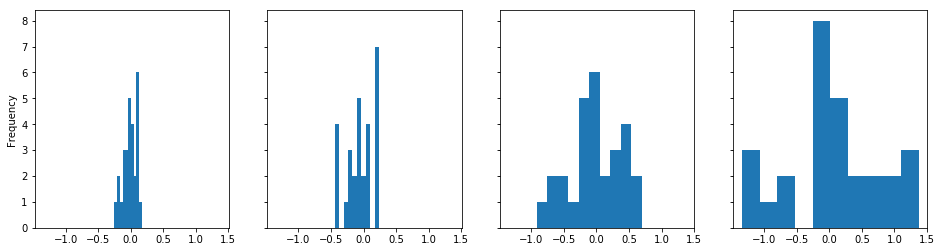

In [16]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 4), sharex=True, sharey=True)
d3[d3['cross'] == 1].loc[:, '1period_return'].plot(kind='hist', ax=ax1)
d3[d3['cross'] == 1].loc[:, '5period_return'].plot(kind='hist', ax=ax2)
d3[d3['cross'] == 1].loc[:, '10period_return'].plot(kind='hist', ax=ax3)
d3[d3['cross'] == 1].loc[:, '20period_return'].plot(kind='hist', ax=ax4)

## 1-hour data, 9 & 20 period EMAs

In [17]:
collection2 = ma.MACollection(agg60['close'], type_='simple', periods=[9, 20])
collection2.plotWithCrosses(plot_width=800)

Loading BokehJS ...

In [18]:
d4 = collection2.data
res = utility.eval_metric_performance(d4['close'], d4['cross'], [1, 2, 3, 6, 12, 24])

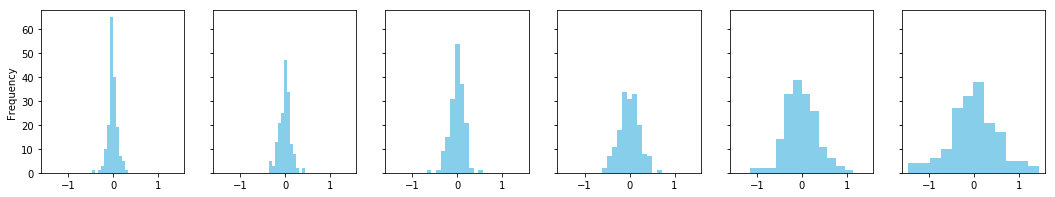

In [19]:
bins=12
color1='skyblue',
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(18, 3), sharex=True, sharey=True)
res[res['cross'] == 1].loc[:, '1period_return'].plot(kind='hist', bins=bins, color=color1, ax=ax1)
res[res['cross'] == 1].loc[:, '2period_return'].plot(kind='hist', bins=bins, color=color1, ax=ax2)
res[res['cross'] == 1].loc[:, '3period_return'].plot(kind='hist', bins=bins, color=color1, ax=ax3)
res[res['cross'] == 1].loc[:, '6period_return'].plot(kind='hist', bins=bins, color=color1, ax=ax4)
res[res['cross'] == 1].loc[:, '12period_return'].plot(kind='hist', bins=bins, color=color1, ax=ax5)
res[res['cross'] == 1].loc[:, '24period_return'].plot(kind='hist', bins=bins, color=color1, ax=ax6)

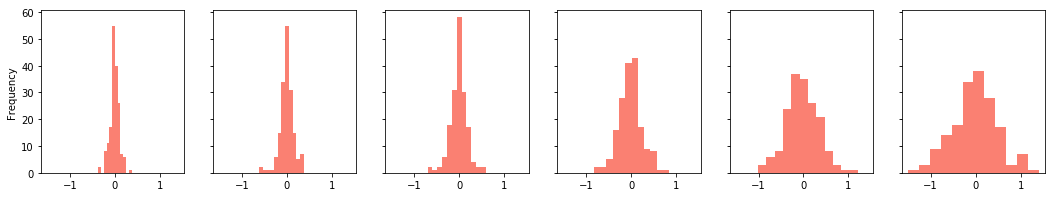

In [20]:
color2='salmon'
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(18, 3), sharex=True, sharey=True)
res[res['cross'] == -1].loc[:, '1period_return'].plot(kind='hist', bins=bins, color=color2, ax=ax1)
res[res['cross'] == -1].loc[:, '2period_return'].plot(kind='hist', bins=bins, color=color2, ax=ax2)
res[res['cross'] == -1].loc[:, '3period_return'].plot(kind='hist', bins=bins, color=color2, ax=ax3)
res[res['cross'] == -1].loc[:, '6period_return'].plot(kind='hist', bins=bins, color=color2, ax=ax4)
res[res['cross'] == -1].loc[:, '12period_return'].plot(kind='hist', bins=bins, color=color2, ax=ax5)
res[res['cross'] == -1].loc[:, '24period_return'].plot(kind='hist', bins=bins, color=color2, ax=ax6)

## 1-day data, 9 & 20 period EMAs

In [21]:
agg1d = utility.aggregate_periods(data, period=1440)

In [22]:
collection3 = ma.MACollection(agg1d['close'], type_='simple', periods=[9, 20])
collection3.plotWithCrosses(plot_width=800)

Loading BokehJS ...

In [23]:
res2 = utility.eval_metric_performance(collection3.data['close'], collection3.data['cross'], [1, 5, 10, 20, 50, 100])

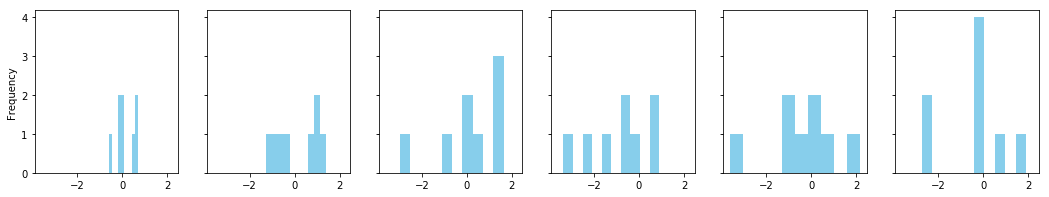

In [24]:
bins=10
color1='skyblue',
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(18, 3), sharex=True, sharey=True)
res2[res2['cross'] == 1].loc[:, '1period_return'].plot(kind='hist', bins=bins, color=color1, ax=ax1)
res2[res2['cross'] == 1].loc[:, '5period_return'].plot(kind='hist', bins=bins, color=color1, ax=ax2)
res2[res2['cross'] == 1].loc[:, '10period_return'].plot(kind='hist', bins=bins, color=color1, ax=ax3)
res2[res2['cross'] == 1].loc[:, '20period_return'].plot(kind='hist', bins=bins, color=color1, ax=ax4)
res2[res2['cross'] == 1].loc[:, '50period_return'].plot(kind='hist', bins=bins, color=color1, ax=ax5)
res2[res2['cross'] == 1].loc[:, '100period_return'].plot(kind='hist', bins=bins, color=color1, ax=ax6)

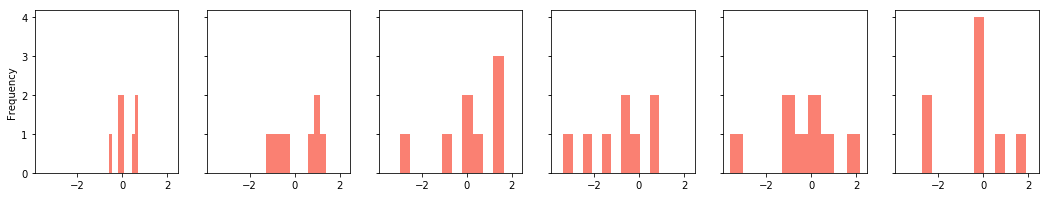

In [25]:
color2='salmon'
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(18, 3), sharex=True, sharey=True)
res2[res2['cross'] == 1].loc[:, '1period_return'].plot(kind='hist', bins=bins, color=color2, ax=ax1)
res2[res2['cross'] == 1].loc[:, '5period_return'].plot(kind='hist', bins=bins, color=color2, ax=ax2)
res2[res2['cross'] == 1].loc[:, '10period_return'].plot(kind='hist', bins=bins, color=color2, ax=ax3)
res2[res2['cross'] == 1].loc[:, '20period_return'].plot(kind='hist', bins=bins, color=color2, ax=ax4)
res2[res2['cross'] == 1].loc[:, '50period_return'].plot(kind='hist', bins=bins, color=color2, ax=ax5)
res2[res2['cross'] == 1].loc[:, '100period_return'].plot(kind='hist', bins=bins, color=color2, ax=ax6)

### I need to aggregate more data to get better idea of the distributions

## 15min data, 9 & 20 period EMAs

In [28]:
agg15m = utility.aggregate_periods(data, period=15)
collection4 = ma.MACollection(agg15m['close'], type_='simple', periods=[9, 20])
collection4.getCrosses()

In [29]:
res2 = utility.eval_metric_performance(collection4.data['close'], collection4.data['cross'], [1, 5, 10, 20, 50, 100])

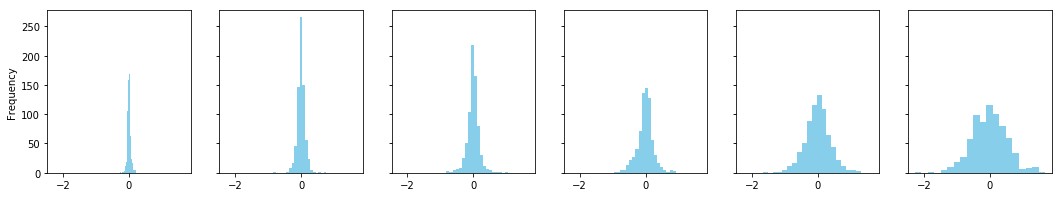

In [38]:
bins=20
color1='skyblue',
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(18, 3), sharex=True, sharey=True)
res2[res2['cross'] == 1].loc[:, '1period_return'].plot(kind='hist', bins=bins, color=color1, ax=ax1)
res2[res2['cross'] == 1].loc[:, '5period_return'].plot(kind='hist', bins=bins, color=color1, ax=ax2)
res2[res2['cross'] == 1].loc[:, '10period_return'].plot(kind='hist', bins=bins, color=color1, ax=ax3)
res2[res2['cross'] == 1].loc[:, '20period_return'].plot(kind='hist', bins=bins, color=color1, ax=ax4)
res2[res2['cross'] == 1].loc[:, '50period_return'].plot(kind='hist', bins=bins, color=color1, ax=ax5)
res2[res2['cross'] == 1].loc[:, '100period_return'].plot(kind='hist', bins=bins, color=color1, ax=ax6)

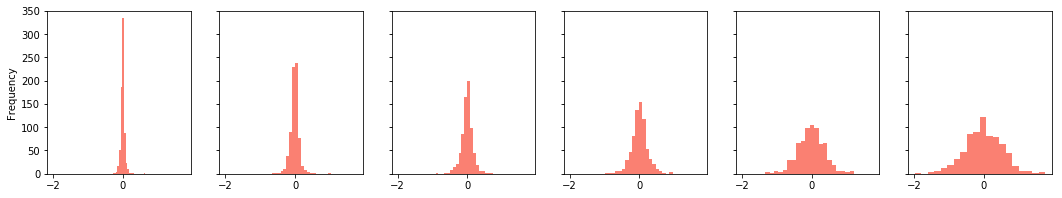

In [40]:
color2='salmon'
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(18, 3), sharex=True, sharey=True)
res2[res2['cross'] == -1].loc[:, '1period_return'].plot(kind='hist', bins=bins, color=color2, ax=ax1)
res2[res2['cross'] == -1].loc[:, '5period_return'].plot(kind='hist', bins=bins, color=color2, ax=ax2)
res2[res2['cross'] == -1].loc[:, '10period_return'].plot(kind='hist', bins=bins, color=color2, ax=ax3)
res2[res2['cross'] == -1].loc[:, '20period_return'].plot(kind='hist', bins=bins, color=color2, ax=ax4)
res2[res2['cross'] == -1].loc[:, '50period_return'].plot(kind='hist', bins=bins, color=color2, ax=ax5)
res2[res2['cross'] == -1].loc[:, '100period_return'].plot(kind='hist', bins=bins, color=color2, ax=ax6)